# Solving Bohachevsky function using scipy dual annealing

In [1]:
#pip install scipy
import numpy as np
from scipy.optimize import dual_annealing

# define objective function/s
def objective_function(solution):
    # Bohachevsky function
    return solution[0]**2 +2*(solution[1]**2) - 0.3*np.cos(3*np.pi*solution[0]) - 0.4*np.cos(4*np.pi*solution[1]) + 0.7

# define boundary constraints of the decision variables
bounds = np.asarray([[-100, 100], [-100, 100]]) #B

# perform dual annealing search
res_dual = dual_annealing(objective_function, bounds=bounds, maxiter = 100) #C

# print Dual Annealing Solution
print('Dual Annealing Solution: f(%s) = %.5f' % (res_dual['x'], res_dual['fun']))

Dual Annealing Solution: f([ 6.18612049e-01 -1.34619843e-09]) = 0.41293


# Solving Bohachevsky function using MEALPY SA

In [2]:
#!pip install mealpy
from numpy import exp, arange
import matplotlib.pyplot as plt
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from mealpy.physics_based.SA import OriginalSA

# define the problem
problem = {
    "fit_func": objective_function,
    "lb": [bounds[0][0], bounds[1][0]],
    "ub": [bounds[0][1], bounds[1][1]],
    "minmax": "min",
    "obj_weights": [1, 1]
}

# define algorithm parameters
epoch = 100 #D
pop_size = 10
max_sub_iter = 2
t0 = 1000
t1 = 1
move_count = 5
mutation_rate = 0.1
mutation_step_size = 0.1
mutation_step_size_damp = 0.99

#define a SA solver
model = OriginalSA(epoch, pop_size, max_sub_iter, t0, t1, move_count, mutation_rate, mutation_step_size, mutation_step_size_damp) #E

#solve the problem using defined solver
mealpy_solution, mealpy_value = model.solve(problem) #F

# print MEALPY SA Solution
print('MEALPY SA Solution: f(%s) = %.5f' % (mealpy_solution, mealpy_value))

2023/02/04 12:06:15 PM, INFO, mealpy.physics_based.SA.OriginalSA: Solving single objective optimization problem.
2023/02/04 12:06:16 PM, INFO, mealpy.physics_based.SA.OriginalSA: >Problem: P, Epoch: 1, Current best: 302.23525096187655, Global best: 302.23525096187655, Runtime: 0.02091 seconds
2023/02/04 12:06:16 PM, INFO, mealpy.physics_based.SA.OriginalSA: >Problem: P, Epoch: 2, Current best: 3.6983026414863165, Global best: 3.6983026414863165, Runtime: 0.02671 seconds
2023/02/04 12:06:16 PM, INFO, mealpy.physics_based.SA.OriginalSA: >Problem: P, Epoch: 3, Current best: 2.6006545431033024, Global best: 2.6006545431033024, Runtime: 0.02722 seconds
2023/02/04 12:06:16 PM, INFO, mealpy.physics_based.SA.OriginalSA: >Problem: P, Epoch: 4, Current best: 2.3568707660332278, Global best: 2.3568707660332278, Runtime: 0.02152 seconds
2023/02/04 12:06:16 PM, INFO, mealpy.physics_based.SA.OriginalSA: >Problem: P, Epoch: 5, Current best: 1.0332655047427726, Global best: 1.0332655047427726, Runtime

MEALPY SA Solution: f([0.06970857 0.01399865]) = 0.07387


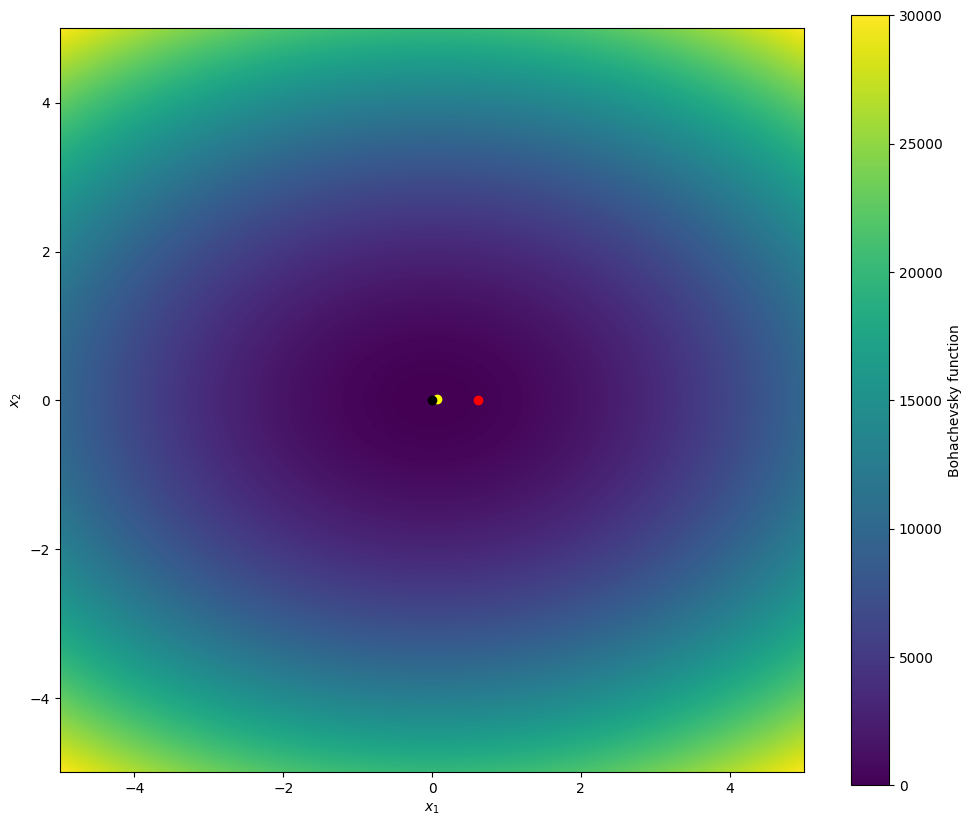

In [3]:
# plottinng the objective functions and the obtained solutions
x = arange(bounds[0][0],bounds[0][1],0.1) #G
y = arange(bounds[0][0],bounds[0][1],0.1) #G
X,Y = meshgrid(x, y) #G
F = objective_function([X,Y]) #G

plt.figure(figsize=(12, 10)) #G
plt.imshow(F, extent=[-5, 5,-5, 5], origin='lower', cmap='viridis') #G
plt.colorbar(label="Bohachevsky function") #G
plt.scatter(res_dual['x'][0],res_dual['x'][1], c='red') #G
plt.scatter(mealpy_solution[0],mealpy_solution[1], c='yellow') #G
plt.scatter(0,0, c='black') #G
plt.xlabel('$x_1$') #G
plt.ylabel('$x_2$') #G
plt.show() #G